In [1]:
from MS461xx_RawSockets_example import *
import pyvisa

In [3]:
pip install serial

Note: you may need to restart the kernel to use updated packages.


In [4]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import time
import datetime
import serial

In [6]:
shockline_socket = InstrumentSocketConnection('* TCPIP0::132.163.130.56::5001::SOCKET', 30)

In [7]:
shockline_socket.query("*IDN?")

'ANRITSU,MS46122B,2250307,V2023.7.5,V2.3.20'

(4.001, 4.01)

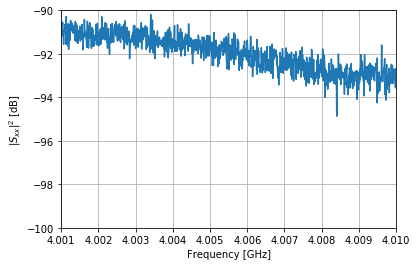

In [33]:
# Get frequency points and turn them into a array
fstring = shockline_socket.query(":SENS1:FREQ:DATA?")
fstringarray = fstring.split(' ')[1:len(fstring.split(' '))]
frequency = []
for index in range(len(fstringarray)):
    frequency.append(float(fstringarray[index]))
frequency = np.array(frequency)
# get the data from the one trace, real and imaginary parts
datastring = shockline_socket.query(":CALC1:PAR1:DATA:SDAT?")
datastringarray = datastring.split('\n')
datastringarray[0] = datastringarray[0].split('#9000029999')[1]# why is this mysterious long number always inserted?

# we use Sxx because while we're just measuring S21 on the Anritsu VNA
Sxx_real = []
Sxx_imag = []

for index in range(len(datastringarray)):
    r1 = float(datastringarray[index].split(',')[0])
    i1 = float(datastringarray[index].split(',')[1])
    Sxx_real.append(r1)
    Sxx_imag.append(i1)

Sxx_real = np.array(Sxx_real)
Sxx_imag = np.array(Sxx_imag)
plt.plot(frequency/1e9,10*np.log10(Sxx_real*Sxx_real + Sxx_imag*Sxx_imag)) 
plt.xlabel('Frequency [GHz]')
plt.ylabel('$|S_{xx}|^2$ [dB]')
plt.ylim((-100,-90))
plt.grid()
plt.xlim((frequency[0]/1e9,frequency[len(frequency) - 1]/1e9))

In [29]:
print(frequency[0])
print(frequency[len(frequency) - 1])

4001000000.0
4010000000.0


(4.001, 4.01)

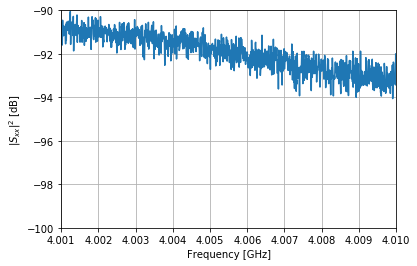

In [32]:
plt.plot(frequency/1e9,10*np.log10(Sxx_real*Sxx_real + Sxx_imag*Sxx_imag)) 
plt.xlabel('Frequency [GHz]')
plt.ylabel('$|S_{xx}|^2$ [dB]')
plt.ylim((-100,-90))
plt.grid()
plt.xlim((frequency[0]/1e9,frequency[len(frequency) - 1]/1e9))

In [ ]:
plt.plot(np.array(frequency)/1e9,10*np.log10(np.array(Sxx_real)*np.array(Sxx_real) + np.array(Sxx_imag)*np.array(Sxx_imag)))
plt.grid()
plt.xlabel('Frequency [GHz]')
plt.ylabel('$|S_{11}|^2$ [dB]')
plt.ylim((-10,0))
plt.xlim((0.1,43)) 

In [12]:
fstring = shockline_socket.query(":SENS1:FREQ:DATA?")
fstringarray = fstring.split(' ')[1:len(fstring.split(' '))]
frequency = []
for index in range(len(fstringarray)):
    frequency.append(float(fstringarray[index]))
    
data1string = shockline_socket.query(":CALC1:PAR1:DATA:SDAT?")
data2string = shockline_socket.query(":CALC1:PAR2:DATA:SDAT?")
data3string = shockline_socket.query(":CALC1:PAR3:DATA:SDAT?")
data4string = shockline_socket.query(":CALC1:PAR4:DATA:SDAT?")

data1stringarray = data1string.split('\n')
data2stringarray = data2string.split('\n')
data3stringarray = data3string.split('\n')
data4stringarray = data4string.split('\n')

data1stringarray[0] = data1stringarray[0].split('#9000029999')[1]# why is this mysterious long number always inserted?
data2stringarray[0] = data2stringarray[0].split('#9000029999')[1]# how do i remove it?
data3stringarray[0] = data3stringarray[0].split('#9000029999')[1]# i have no idea!  LFS Oct 2024
data4stringarray[0] = data4stringarray[0].split('#9000029999')[1]
S11_real = []
S11_imag = []
S12_real = []
S12_imag = []
S21_real = []
S21_imag = []
S22_real = []
S22_imag = []
for index in range(len(data1stringarray)):
    r1 = float(data1stringarray[index].split(',')[0])
    i1 = float(data1stringarray[index].split(',')[1])
    S11_real.append(r1)
    S11_imag.append(i1)
    r2 = float(data2stringarray[index].split(',')[0])
    i2 = float(data2stringarray[index].split(',')[1])
    S12_real.append(r2)
    S12_imag.append(i2)
    r3 = float(data3stringarray[index].split(',')[0])
    i3 = float(data3stringarray[index].split(',')[1])
    S21_real.append(r3)
    S21_imag.append(i3)
    r4 = float(data4stringarray[index].split(',')[0])
    i4 = float(data4stringarray[index].split(',')[1])
    S22_real.append(r4)
    S22_imag.append(i4)
plt.plot(np.array(frequency)/1e9,10*np.log10(np.array(S11_real)*np.array(S11_real) + np.array(S11_imag)*np.array(S11_imag)))
plt.grid()
plt.xlabel('Frequency [GHz]')
plt.ylabel('$|S_{11}|^2$ [dB]')
plt.ylim((-10,0))
plt.xlim((0.1,43)) 

timeout: timed out

(0.1, 43.0)

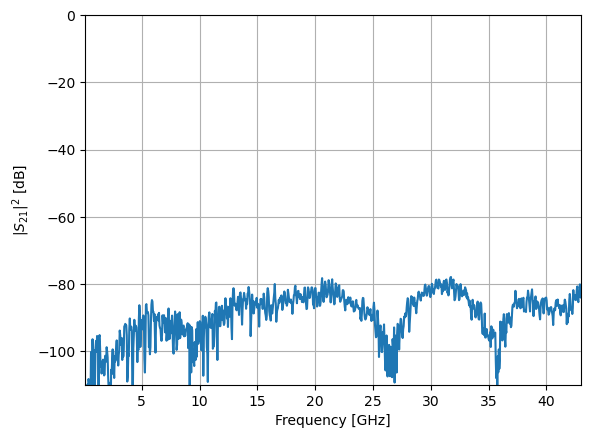

In [144]:
plt.plot(np.array(frequency)/1e9,10*np.log10(np.array(S21_real)*np.array(S21_real) + np.array(S21_imag)*np.array(S21_imag)))
plt.grid()
plt.xlabel('Frequency [GHz]')
plt.ylabel('$|S_{21}|^2$ [dB]')
plt.ylim((-110,0))
plt.xlim((0.1,43)) 

(1.0, 43.0)

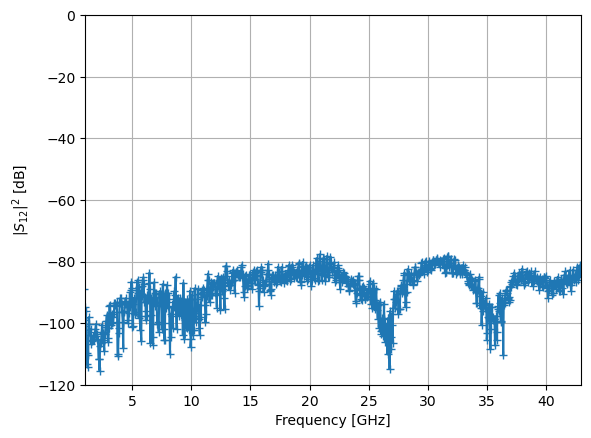

In [102]:
fstring = shockline_socket.query(":SENS1:FREQ:DATA?")
fstringarray = fstring.split(' ')[1:len(fstring.split(' '))]
frequency = []
for index in range(len(fstringarray)):
    frequency.append(float(fstringarray[index]))
data1string = shockline_socket.query(":CALC1:PAR2:DATA:SDAT?")
data1stringarray = data1string.split('\n')
data1stringarray[0] = data1stringarray[0].split(' ')[1]
real1 = []
imag1 = []
logmagdb1 = []
for index in range(len(data1stringarray)):
    r1 = float(data1stringarray[index].split(',')[0])
    i1 = float(data1stringarray[index].split(',')[1])
    real1.append(r1)
    imag1.append(i1)
    logmagdb1.append(10*np.log10(r1*r1 + i1*i1))    
plt.plot(np.array(frequency)/1e9,np.array(logmagdb1),'-+')
plt.grid()
plt.xlabel('Frequency [GHz]')
plt.ylabel('$|S_{12}|^2$ [dB]')
plt.ylim((-120,0))
plt.xlim((1,43))

In [111]:
fstring = shockline_socket.query(":SENS1:FREQ:DATA?")
fstringarray = fstring.split(' ')[1:len(fstring.split(' '))]
frequency = []
for index in range(len(fstringarray)):
    frequency.append(float(fstringarray[index]))
data1string = shockline_socket.query(":CALC1:PAR3:DATA:SDAT?")
data1stringarray = data1string.split('\n')
data1stringarray[0] = data1stringarray[0].split(' ')[1]
real1 = []
imag1 = []
logmagdb1 = []
for index in range(len(data1stringarray)):
    r1 = float(data1stringarray[index].split(',')[0])
    i1 = float(data1stringarray[index].split(',')[1])
    real1.append(r1)
    imag1.append(i1)
    logmagdb1.append(10*np.log10(r1*r1 + i1*i1))    
plt.plot(np.array(frequency)/1e9,np.array(logmagdb1),'-+')
plt.grid()
plt.xlabel('Frequency [GHz]')
plt.ylabel('$|S_{12}|^2$ [dB]')
plt.ylim((-120,0))
plt.xlim((1,43))

ValueError: could not convert string to float: ''

In [108]:
data1stringarray

['6.064867E-007,-5.224066E-007',
 '-1.685818E-006,-3.086778E-006',
 ' 1.870090E-006,-3.257971E-007',
 '-1.569524E-006,-5.898627E-007',
 ' 8.121753E-007, 8.927421E-007',
 ' 2.701960E-007, 1.444219E-006',
 '-1.586619E-006,-2.100152E-006',
 '-2.283115E-006, 6.763411E-007',
 '-3.733704E-007,-4.424680E-007',
 '-1.016091E-006, 3.108277E-006',
 ' 2.656525E-006,-4.166334E-007',
 ' 3.157320E-008,-1.354784E-006',
 ' 1.344090E-006, 1.007845E-006',
 '-2.468107E-006, 1.197019E-007',
 ' 9.119801E-007, 8.611604E-006',
 '-2.705807E-006,-6.512427E-006',
 '-8.338695E-007, 4.268390E-007',
 ' 9.188407E-007, 1.277090E-005',
 ' 2.187920E-006, 4.806966E-006',
 ' 1.015277E-005,-4.003206E-007',
 ' 5.394617E-006,-2.999649E-006',
 ' 2.226209E-006,-1.555278E-006',
 '-3.760671E-006, 1.646099E-006',
 ' 4.258264E-006, 1.110233E-005',
 ' 4.445412E-006,-1.357873E-005',
 '-1.034832E-005, 6.020402E-007',
 ' 7.579057E-008, 1.737995E-005',
 ' 1.207277E-005, 9.115688E-006',
 ' 1.023204E-005, 8.528396E-007',
 ' 5.317109E-00

(1.0, 43.0)

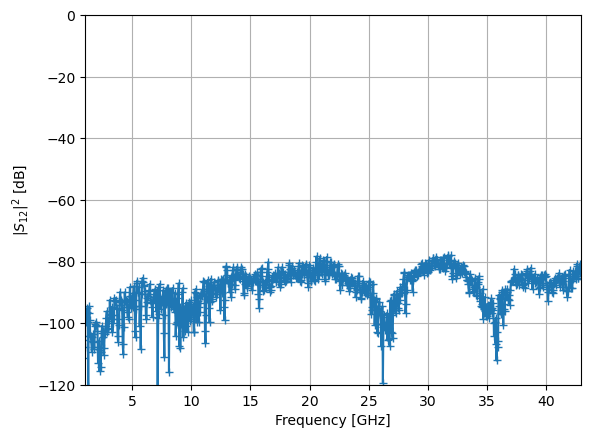